In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect



In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

C:\Users\vkole\AppData\Local\Temp\ipykernel_40704\3601434573.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement= Base.classes.measurement
Station=Base.classes.station


In [8]:
# Create a session
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


#inspector = inspect(engine)
#columns = inspector.get_columns('measurement')
#for c in columns:
#   print(c['name'], c["type"])

most_rec_date= session.query(func.max(Measurement.date)).scalar() #CHATGBT
print(f"{most_rec_date} is the most recent date in data set ")


2017-08-23 is the most recent date in data set 


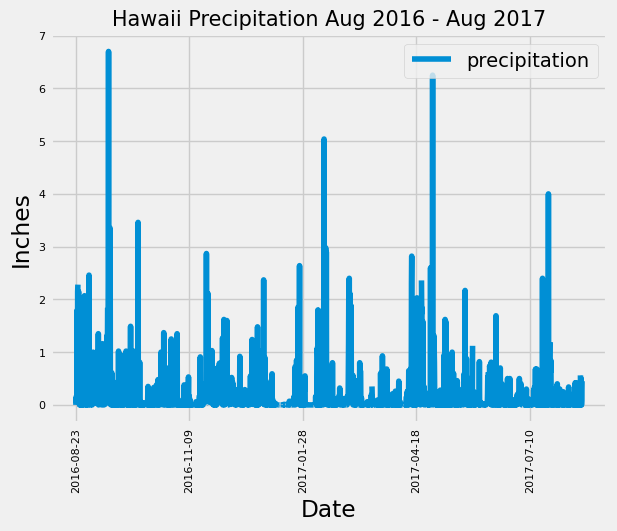

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.


# Starting from the most recent data point in the database.
year= dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
prev_last_date = dt.date(year.year, year.month, year.day)
# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_last_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df =pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df.set_index(df['date'], inplace =True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date','precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 15)
plt.legend(["precipitation"],loc='upper right')
plt.xticks(rotation=90, size = 8)
plt.yticks(size = 8)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(16.03333333333333, 0.5, 'Frequency')

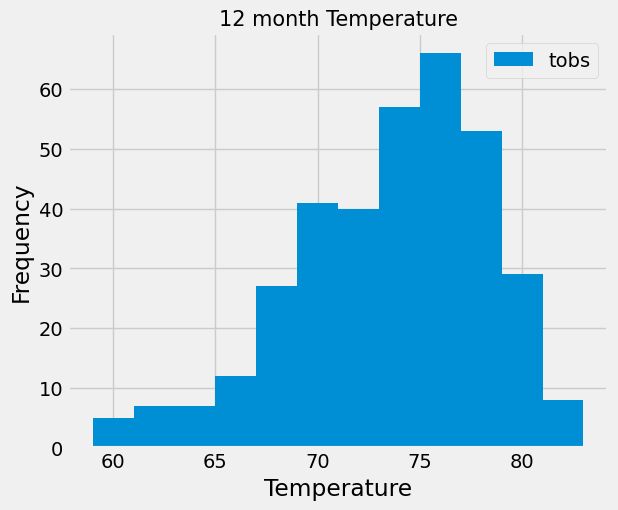

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>='2016-08-23').all()

high_temp=pd.DataFrame(results,columns=['tobs'])
high_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature", size=15)
plt.xlabel("Temperature")
plt.ylabel("Frequency")


# Close Session

In [16]:
# Close Session
session.close()
